
# Project: Investigate a Dataset - [TMDB-Movies Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limitation">Limitation</a></li>  
</ul>

#### <a id='intro'></a>
## Introduction
The movie dataset contains 10000 row and 21 column (id, imdb_id, popularity, budget, revenue, ... , revenue_adj) which collected from The Movie Database. Columns cast and genres contain multiple values separated by (|) character We will deal with it later. Director column contains name of movie director. Budget column contains movie budget and so on. Let's analysis a lot of features for this data. I'm very excited about it



### Question(s) for Analysis
1-Number of movies for each actor in the data?<br>
2-What is the most and least popular genre of movie?<br>
3-Top 10 most popular movies<br>
4-Top 10 movies in terms of vote rating<br>
5-The number of films released each year?<br>
6-Comparison of the best and worst movie in terms of revenue<br>
7-Calculate Profit and find top 10 movie with new feature<br>
8-Does Popularity depends On Profit?<br>
9-Correlation between some feature<br>

In [ ]:
pip install seaborn==0.9.0

In [1]:
#import packages to use it.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section will perform many steps to prepare the data to become clean and correct format to use it to analysis

### **Load and read the dataset**

In [2]:
#Load the dataset
df = pd.read_csv('tmdb-movies.csv')
#print first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### print number of row and column 

In [3]:
#get the dimension of dataset
dem = df.shape
#display number of row
print("Number of row: ",dem[0])
#display number of column
print("Number of column: ",dem[1])

Number of row:  10866
Number of column:  21


### print column names and datatype

In [4]:
#get some informatiom about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Descriptive Statistics
To calculate each columns (count, mean, std, min, 25%, 50%, 75%, max)

In [5]:
#get some descriptive statistics about this dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning
in this section, need to be cleaned i will perform those cleaning steps 

#### Number of row in each column which contains NAN value

In [6]:
#number of null value in each row
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Replace NAN value with zero

In [7]:
#replace all null value with empty string
df.fillna("Empty", inplace=True)

#### Number of duplicate rows

In [8]:
#number of duplicate row
df.duplicated().sum()

1

#### Remove of duplicate rows

In [9]:
#remove duplicate row
df.drop_duplicates(inplace=True)

#### Correction datatype of release_date column from object to datetime format 

In [10]:
#chane datatype from obect to datatime
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

#### Descriptive statistics after cleaning

In [11]:
#get some descriptive statistics about this dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Declaration functions

#### split column with | character ex: cast column, keywords column, genres column

In [12]:
#this funcation take column name to split column with | character and return dataframe with these value
def split_column(column):
    data_split = df[column].str.cat(sep = '|')
    data = pd.DataFrame(data_split.split('|'))
    return data

#### Return the top ten row in selected column

In [13]:
#this funcation take two column name to return top ten value
def top_ten(column1, column2):
    data = df[[column1, column2]]
    top_data = data.sort_values(by = column2,ascending=False).iloc[:10]
    return top_data

### Research Question 1 (Number of movies for each actor in the data)

In [14]:
#names actors
actors = split_column('cast')
#nmber movies for each actor
actor_films = actors.value_counts()
#remove empty value ---> nan
actor_films.drop('Empty', level=0, inplace=True)
actor_films

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Jake Hoffman          1
Jake McKinnon         1
Jake Miller           1
Jake Mosser           1
é‚±æ·‘è²ž             1
Length: 19026, dtype: int64

#### Visualization top 10 actor

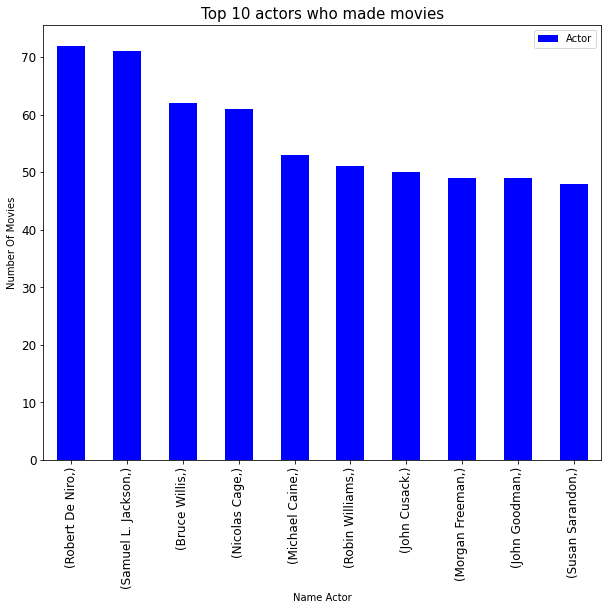

In [15]:
#first ten actor
actor_films = actor_films.iloc[:10]
#visualization top ten actor
actor_films.plot(kind= 'bar',figsize = (10,8),facecolor='b' ,fontsize=12, label='Actor')
plt.title("Top 10 actors who made movies",fontsize=15)
plt.legend()
plt.xlabel('Name Actor',fontsize=10)
plt.ylabel('Number Of Movies',fontsize= 10);

### Research Question 2  (What is the most and least popular genre of movie)

In [16]:
#names genres
genres = split_column('genres')
#number of movies for each genre
number_geners = genres.value_counts()
#remove empty value ---> nan
number_geners.drop('Empty', level=0, inplace=True)
number_geners

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

#### Visualization Genre movies

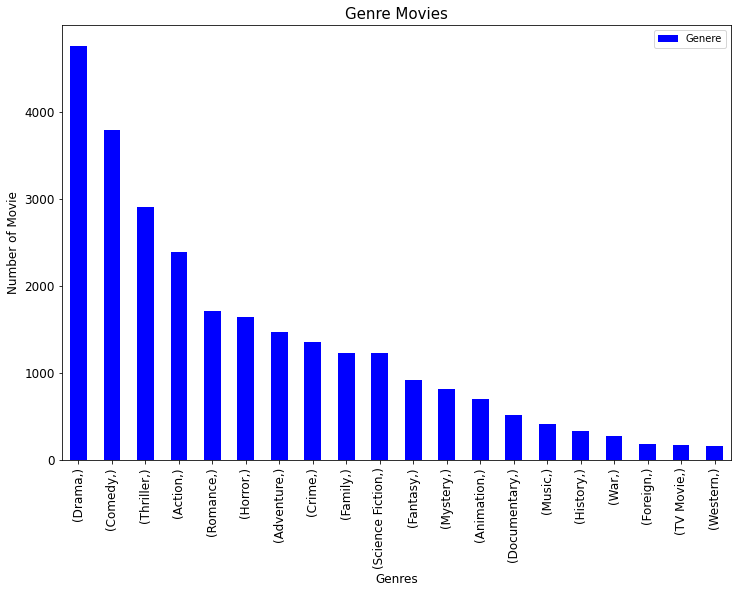

In [17]:
#visualization Genre movies
number_geners.plot(kind= 'bar',figsize = (12,8),fontsize=12, facecolor='b', label='Genere')
plt.title("Genre Movies",fontsize=15)
plt.legend()
plt.xlabel('Genres',fontsize=12)
plt.ylabel("Number of Movie",fontsize= 12);

### Research Question 3  (Top 10 most popular movies)

In [18]:
#top ten rows for popular movies
top_popularity =top_ten('original_title', 'popularity')
top_popularity

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


#### Visualization top 10 most popular movies

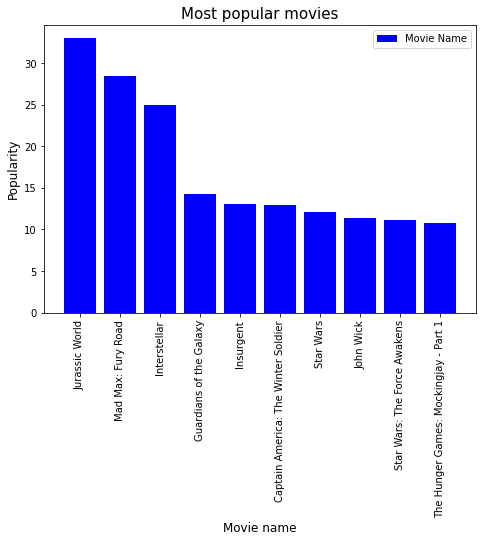

In [19]:
#visualization top 10 most popular movies
fig1 = plt.figure()
f = fig1.add_axes([0,0,1,1])
f.bar(top_popularity['original_title'],top_popularity['popularity'],facecolor='b',label='Movie Name')
plt.title("Most popular movies",fontsize=15)
plt.legend()
plt.xlabel('Movie name',fontsize=12)
plt.ylabel("Popularity",fontsize= 12);
plt.xticks(rotation = 90) 
plt.show()

### Research Question 4  (Top 10 movies in terms of vote rating)

In [20]:
#top ten rows for vote rating
top_vote = top_ten('original_title', 'vote_average')
top_vote

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5


#### Visualization top 10 most vote rating

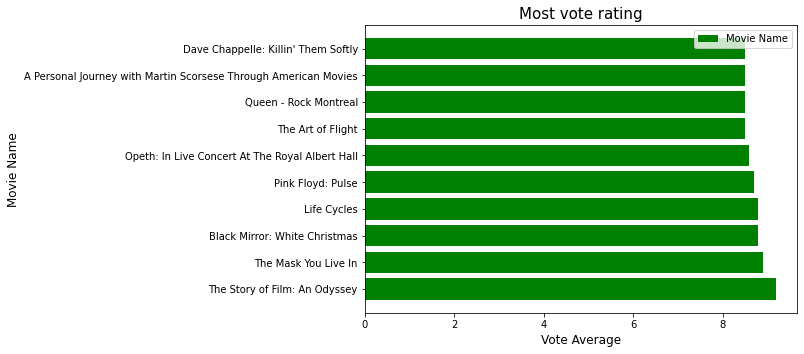

In [21]:
#visualization top 10 most vote rating
fig2 = plt.figure()
f2 = fig2.add_axes([0,0,1,1])
f2.barh(top_vote['original_title'],top_vote['vote_average'],facecolor='g',label='Movie Name')
plt.title("Most vote rating",fontsize=15)
plt.legend()
plt.xlabel('Vote Average',fontsize=12)
plt.ylabel("Movie Name",fontsize= 12);
plt.show()

### Research Question 5  (The number of films released each year)

In [22]:
#number of movies in each year from 1960 to 2015
film_release = df.groupby('release_year').count()['original_title']
film_release.iloc[:10]

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
1969    31
Name: original_title, dtype: int64

#### Visualization number of movies in each year


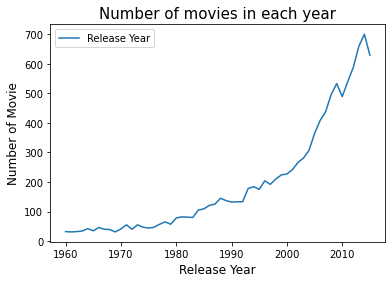

In [23]:
#visualization number of movies in each year
film_release.plot(xticks = np.arange(1960,2020,10),label='Release Year')
plt.title("Number of movies in each year",fontsize=15)
plt.legend()
plt.xlabel('Release Year',fontsize=12)
plt.ylabel("Number of Movie",fontsize= 12)
plt.show();

### Research Question 6  (Comparison of the best and worst movie in terms of revenue)

In [24]:
#index min row in revenue column
min_index = df['revenue'].idxmin()
#index max row in revenue column
high_index = df['revenue'].idxmax()
#get row in old dataframe and create new dataframe for this row
high = pd.DataFrame(df.loc[high_index,:])
low = pd.DataFrame(df.loc[min_index,:])
#concatnate two datafram in one datafram
resulat = pd.concat([high,low],axis = 1)
resulat

,1386,48
id,19995,265208
imdb_id,tt0499549,tt2231253
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
homepage,http://www.avatarmovie.com/,Empty
director,James Cameron,Simon West
tagline,Enter the World of Pandora.,Never bet against a man with a killer hand.


In [25]:
# Top 10 movies in terms of revenue
top_vote = top_ten('original_title', 'revenue')
top_vote

,original_title,revenue
1386,Avatar,2781505847
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360
14,Avengers: Age of Ultron,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,1327817822
5422,Frozen,1274219009
5425,Iron Man 3,1215439994


#### Visualization top 10 movies in terms of revenue

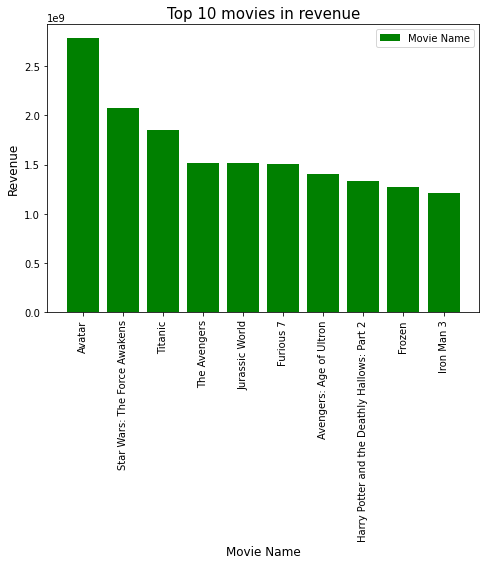

In [26]:
#visualization top 10 movies in terms of revenue
fig3 = plt.figure()
f3 = fig3.add_axes([0,0,1,1])
f3.bar(top_vote['original_title'],top_vote['revenue'],facecolor='g',label='Movie Name')
plt.title("Top 10 movies in revenue",fontsize=15)
plt.legend()
plt.xlabel('Movie Name',fontsize=12)
plt.ylabel("Revenue",fontsize= 12)
plt.xticks(rotation = 90) 
plt.show();

### Research Question 7  (Calculate Profit and find top 10 movie with new feature)

In [27]:
#calculate profit each movie and create column for this in dataframe
df['profit'] = df['revenue'] - df['budget']
#top ten row in column profit
top_profit = top_ten('original_title','profit')
top_profit

,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


#### Visualization top 10 movies in terms of profit

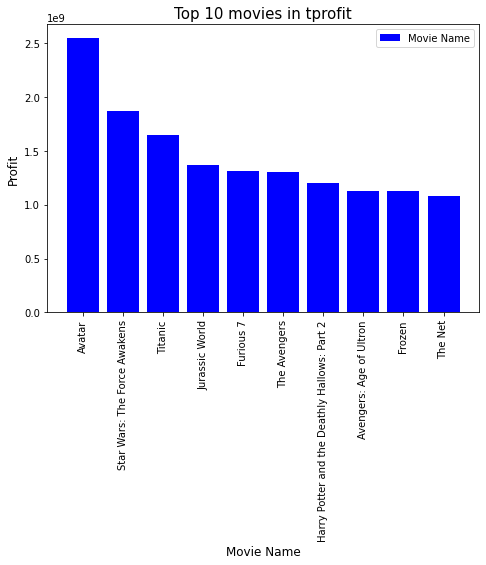

In [28]:
#visualization top 10 movies in terms of profit
fig4 = plt.figure()
f4 = fig4.add_axes([0,0,1,1])
f4.bar(top_profit['original_title'],top_profit['profit'], facecolor='b',label='Movie Name')
plt.title("Top 10 movies in tprofit",fontsize=15)
plt.legend()
plt.xlabel('Movie Name',fontsize=12)
plt.ylabel("Profit",fontsize= 12)
plt.xticks(rotation = 90) 
plt.show()

In [29]:
#get row with min profit
min_row = df.sort_values(by = 'profit',ascending=False).iloc[-1]
#get row with max profit
high_row = df.sort_values(by = 'profit',ascending=False).iloc[0]
print("Most profitable movie is ",high_row.original_title,'(',high_row.profit,')')
print("Less profitable movie is ",min_row.original_title,'(',min_row.profit,')')

Most profitable movie is  Avatar ( 2544505847 )
Less profitable movie is  The Warrior's Way ( -413912431 )


### Research Question 8  (Does Popularity depends On Profit?)

Correlation Between Popularity And Profit :  0.6289972839642584


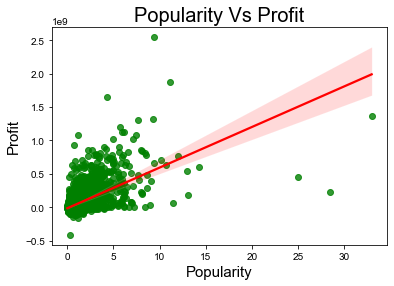

In [30]:
#visualization correlation between popularity and profit
f5 = sns.regplot(x=df['popularity'],y=df['profit'],color='g',line_kws={"color": "red"})
#setup the title and the labels of the scatter plot.
f5.set_title("Popularity Vs Profit",fontsize=20)
f5.set_xlabel("Popularity",fontsize=15)
f5.set_ylabel("Profit",fontsize=15)
#setup the figure size.
sns.set(rc={'figure.figsize':(15,10)})

#find the correlation between them.
data_corr = df.corr()
print("Correlation Between Popularity And Profit : ",data_corr.loc['popularity','profit'])

### Research Question 9  (Correlation between some feature)

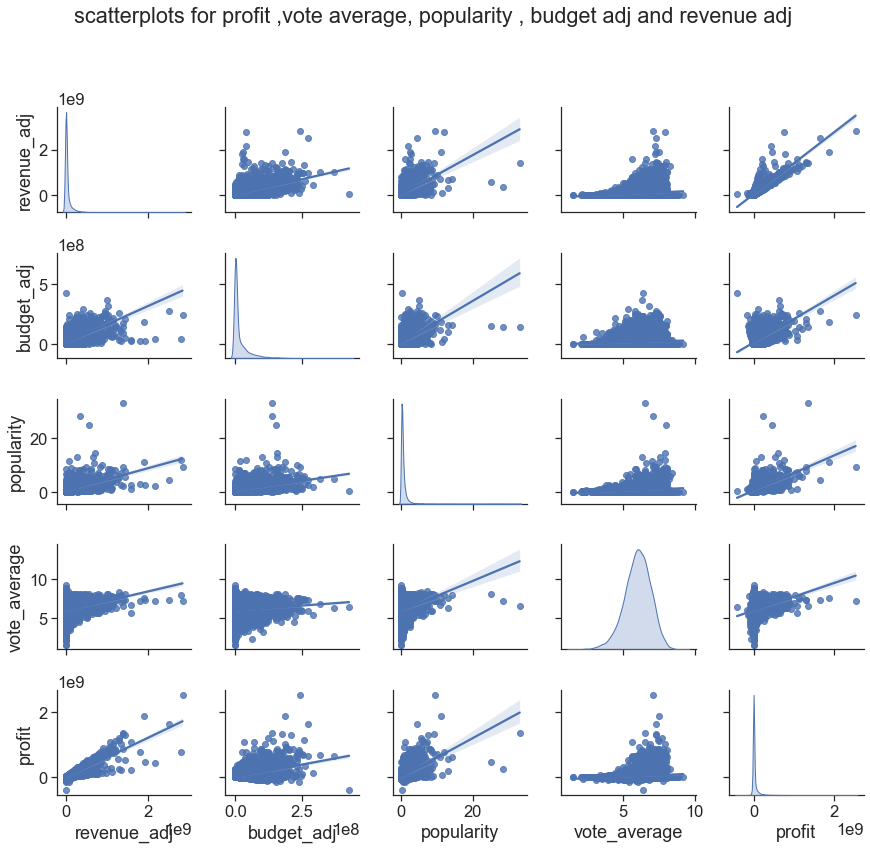

In [31]:
#visualization correlation between some feature
new_data = df[['revenue_adj', 'budget_adj', 'popularity', 'vote_average','profit']]
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.5, style="ticks")
fig1 = sns.pairplot(new_data, kind="reg", diag_kind="kde")
fig1.fig.suptitle('scatterplots for profit ,vote average, popularity , budget adj and revenue adj')
fig1.fig.tight_layout(rect=[0, 0.03, 1, 0.95]);

<a id='conclusions'></a>
## Conclusions
#### We have these results:
1- We notice a very closeness between the actors (Samuel L. Jackson and Bruce Willis) in the number of films they have played.<br>
2- There are a lot of people who like drama movies so they are produced a lot.<br>
3- Jurassic World's movie won the admiration of many viewers.<br>
4- There is fierce competition between movies for all movies to get a high rating.<br>
5- We note that with the passage of time the number of movies is increasing.<br>
6- Avatar movie earn the highest profit in all and the most in loss movie in this dataset is The Warrior's Way. <br>
7- The movie with high profit tends to earn high popularity based on correlation between them.<b>

<a id='Limitation'></a>
## Limitation
#### There are some limitations in this data:
1- The dataset contains are null and zero values in some features, so this loses some important information.<br>
2-I want to drop the rows with missing values but i can not this because we will lose a lot of data b<br>
3- The budget and others column do not have currency unit, This makes the currency unknown, which may lead to some differences in currency differences that make the analysis wrong.<br>
4- null and zeros values creates false results during the correlation plots.<br>
5-The increases the time taken in calculating the result because some feature need some cleaning before use it example genres column this column need to split it by character '|'<br>
